# Tutorial 2 (kraci)

In [10]:
import scDML
print(scDML.__version__)
import scanpy as sc 
import torch
import anndata as ad
from scDML import scDMLModel
from scDML.utils import print_dataset_information
import matplotlib.pyplot as plt
import scib
import os
os.system("clear")

###############
data_dir="/home/ubuntu/benchmarking/data/"
###############


0.0.1


In [2]:
adata_raw = ad.read_h5ad(f"{data_dir}merged_stereo.h5ad")
adata_raw.obs['BATCH'] = adata_raw.obs.batch

In [3]:
adata_raw

AnnData object with n_obs × n_vars = 11000 × 27852
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Brain_shapes', 'Face_shapes', 'Heart_shapes', 'Lung_shapes', 'Liver_shapes', 'Shapes_shapes', 'Belly_shapes', 'Back_shapes', 'region', 'batch', 'BATCH'
    uns: 'log1p', 'pca'
    obsm: 'X_pca', 'spatial', 'spatial_back'
    varm: 'PCs'

## Raw dataset visualization

<Axes: title={'center': 'BATCH'}, xlabel='UMAP1', ylabel='UMAP2'>

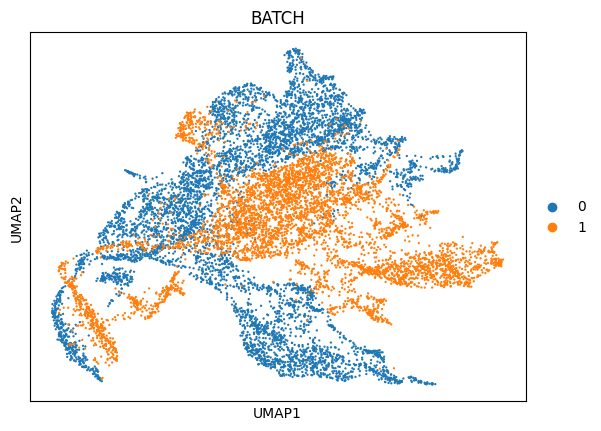

In [4]:
#View raw data,check the batch effect of this batch effect 
adata_copy=adata_raw.copy()
# sc.pp.normalize_total(adata_copy,target_sum=1e4)
# sc.pp.log1p(adata_copy)
# sc.pp.highly_variable_genes(adata_copy,n_top_genes=2000,subset=True)
# sc.pp.scale(adata_copy)
# sc.tl.pca(adata_copy)
sc.pp.neighbors(adata_copy)
sc.tl.umap(adata_copy)
sc.pl.umap(adata_copy,color=["BATCH"],show=False)

## scDML integration

2023-08-16 14:26:51,994 - root - INFO - Create log file....
2023-08-16 14:26:51,997 - root - INFO - Create scDMLModel Object Done....
2023-08-16 14:26:52,000 - root - INFO - Running preprocess() function...
2023-08-16 14:26:52,002 - root - INFO - mode=unsupervised
2023-08-16 14:26:52,004 - root - INFO - clustering method=louvain
2023-08-16 14:26:52,004 - root - INFO - resolution=1.0
2023-08-16 14:26:52,005 - root - INFO - BATCH_key=BATCH
2023-08-16 14:26:52,007 - root - INFO - Normalize counts per cell(sum=10000.0)
2023-08-16 14:26:52,116 - root - INFO - Log1p data


2023-08-16 14:26:52,148 - root - INFO - Select HVG(n_top_genes=1000)
2023-08-16 14:26:53,531 - root - INFO - Scale batch(scale_value=10.0)
2023-08-16 14:26:54,002 - root - INFO - Calculate PCA(n_comps=100)


         Falling back to preprocessing with `sc.pp.pca` and default params.


2023-08-16 14:27:00,532 - root - INFO - Apply louvain clustring(resolution=1.0) initization
2023-08-16 14:27:00,535 - root - INFO - Number of Cluster =12
2023-08-16 14:27:00,537 - root - INFO - clusters=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
2023-08-16 14:27:00,539 - root - INFO - Preprocess Dataset Done...
2023-08-16 14:27:00,540 - root - INFO - mode=unsupervised
2023-08-16 14:27:00,571 - root - INFO - K_in=5,K_bw=10
2023-08-16 14:27:00,573 - root - INFO - Calculate similarity of cluster with KNN and MNN
2023-08-16 14:27:00,574 - root - INFO - appoximate calculate KNN Pair intra batch...
2023-08-16 14:27:00,580 - root - INFO - Calculate KNN pair intra batch...........
2023-08-16 14:27:00,581 - root - INFO - K=5
2023-08-16 14:27:00,582 - root - INFO - metric=cosine
2023-08-16 14:27:00,583 - root - INFO - Processing datasets: (0, 0) = ('0', '0')
2023-08-16 14:27:01,397 - root - INFO - There are (38806) KNN pairs when processing (0, 0)=('0', '0')
2023-08-16 14:27:01,398 - root - INFO - P

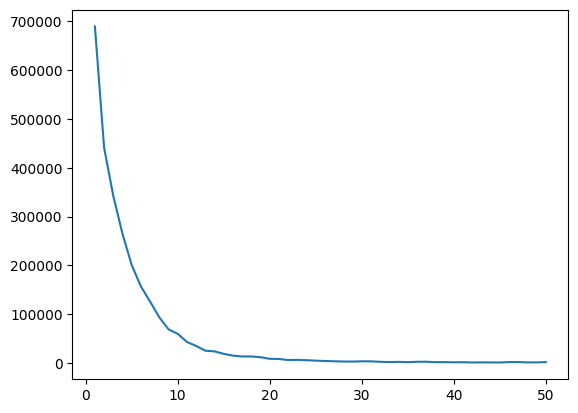

In [5]:
## fullrun
save_dir="./test_result/"+"merged_stereo/"

ncluster = 24

scdml=scDMLModel(save_dir=save_dir)
adata=scdml.preprocess(adata_copy,cluster_method="louvain",resolution=1.0)
#print(adata)
scdml.integrate(adata,batch_key="BATCH",ncluster_list=[ncluster],
               expect_num_cluster=ncluster,merge_rule="rule2")

plt.plot(range(1,len(scdml.loss)+1),scdml.loss)

## visulization of integrated embedding

<Axes: title={'center': 'BATCH'}, xlabel='UMAP1', ylabel='UMAP2'>

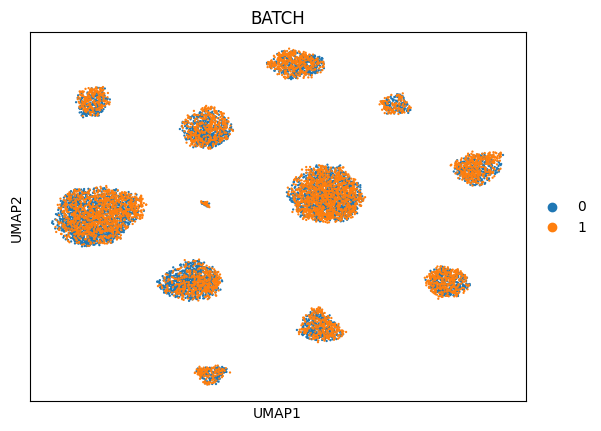

In [6]:
###########################################
sc.pp.neighbors(adata,random_state=0,use_rep="X_emb")
sc.tl.umap(adata)
###########################################

sc.pl.umap(adata,color=["BATCH"],show=False)
#plt.savefig(save_dir+"scDML_embedding1.png")
# sc.pl.umap(adata,color=["celltype","reassign_cluster"],legend_loc="on data",show=False)
#plt.savefig(save_dir+"scDML_embedding2.png")

# sc.pl.umap(adata,color=["celltype"],groups=["OFFx"],na_in_legend=False)

## evaluation

In [7]:
# import pandas as pd
# df=pd.crosstab(adata.obs["celltype"],adata.obs["reassign_cluster"])
# col=df.apply('idxmax', axis=1).values
# df=df[col]
# df

In [16]:
scib.me.ilisi_graph(adata, batch_key="batch", type_="embed", use_rep="X_umap")

Chunk 54 does not have enough neighbors. Skipping...
Chunk 72 does not have enough neighbors. Skipping...
Chunk 502 does not have enough neighbors. Skipping...
Chunk 552 does not have enough neighbors. Skipping...
Chunk 628 does not have enough neighbors. Skipping...
Chunk 768 does not have enough neighbors. Skipping...
Chunk 1287 does not have enough neighbors. Skipping...
Chunk 1658 does not have enough neighbors. Skipping...
Chunk 2185 does not have enough neighbors. Skipping...
Chunk 2467 does not have enough neighbors. Skipping...
Chunk 2710 does not have enough neighbors. Skipping...
Chunk 2935 does not have enough neighbors. Skipping...
Chunk 3407 does not have enough neighbors. Skipping...
Chunk 3480 does not have enough neighbors. Skipping...
Chunk 3488 does not have enough neighbors. Skipping...
Chunk 4378 does not have enough neighbors. Skipping...
Chunk 4524 does not have enough neighbors. Skipping...
Chunk 4577 does not have enough neighbors. Skipping...
Chunk 4626 does no

0.8987666952290709